# Clean up Raw Compiled qPCR Data

### John & Meeghan May-June  2016

Previously dumped long compiled Ct data 
    
> ./data/GEP_qPCR_results.raw.csv

- This workflow compiles all data **minus complete excludes**
- this workflow dumped ./qPCRMean_Set1.csv

In [2]:
library(lubridate)
library(dplyr) 
library(data.table) 
library(ggplot2) 
library(readr) 
library(tidyr) 
library(magrittr)

In [3]:
# Load compiled data , master table

qPCRdt <- suppressWarnings(fread("./data/GEP_qPCR_results_merged.csv"))
dim(qPCRdt)
head(qPCRdt)

[1] 10230    22

,Name,Plate,sample_well,SampleDate,qPCR_well,Cp,gene,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,Vern,Cult,Pp,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,AMK105,GEP1,A1,2014-02-04,A1,NA,VRN1,1,A,3,105,300105,None,Amarok,16,,,,,,,
2,AMK105,GEP1,A1,2014-02-04,A2,NA,VRN1,1,A,3,105,300105,None,Amarok,16,,,,,,,
3,AMK105,GEP1,A1,2014-02-04,B1,NA,VRN1,1,A,3,105,300105,None,Amarok,16,,,,,,,
4,AMK105,GEP1,A1,2014-02-04,A1,NA,VRN2,1,A,3,105,300105,None,Amarok,16,,,,,,,
5,AMK105,GEP1,A1,2014-02-04,A2,31.47,VRN2,1,A,3,105,300105,None,Amarok,16,,,,,,,
6,AMK105,GEP1,A1,2014-02-04,B1,30.73,VRN2,1,A,3,105,300105,None,Amarok,16,,,,,,,


In [4]:
qPCRdt %>%
    mutate(Pp=factor(Pp)) %>% 
    mutate(Vern=factor(tolower(Vern))) %>% 
    mutate(Cult=factor(Cult)) %>% 
    mutate(Experiment=factor(Experiment)) %>%
    head()

,Name,Plate,sample_well,SampleDate,qPCR_well,Cp,gene,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,Vern,Cult,Pp,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,AMK105,GEP1,A1,2014-02-04,A1,NA,VRN1,1,A,3,105,300105,none,Amarok,16,,,,,,,
2,AMK105,GEP1,A1,2014-02-04,A2,NA,VRN1,1,A,3,105,300105,none,Amarok,16,,,,,,,
3,AMK105,GEP1,A1,2014-02-04,B1,NA,VRN1,1,A,3,105,300105,none,Amarok,16,,,,,,,
4,AMK105,GEP1,A1,2014-02-04,A1,NA,VRN2,1,A,3,105,300105,none,Amarok,16,,,,,,,
5,AMK105,GEP1,A1,2014-02-04,A2,31.47,VRN2,1,A,3,105,300105,none,Amarok,16,,,,,,,
6,AMK105,GEP1,A1,2014-02-04,B1,30.73,VRN2,1,A,3,105,300105,none,Amarok,16,,,,,,,


Warning message:
: Removed 5307 rows containing non-finite values (stat_boxplot).

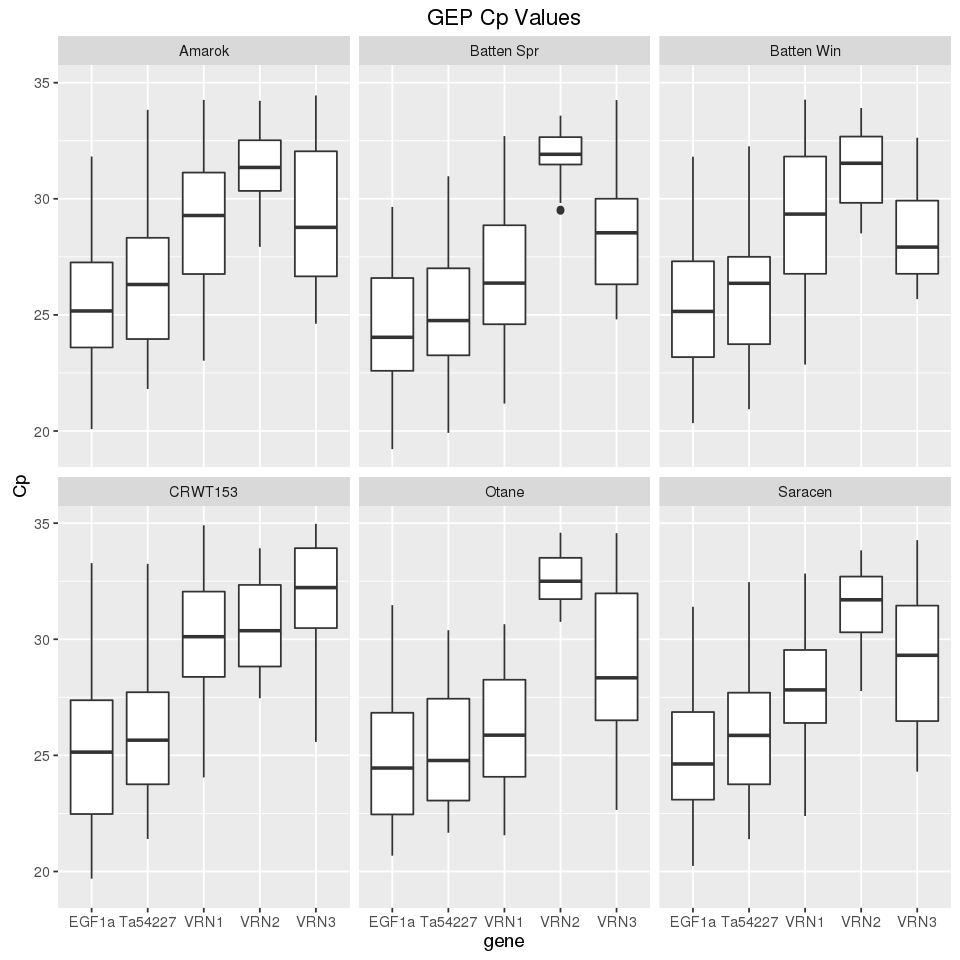

In [5]:
options(repr.plot.width=8, repr.plot.height=8)

qPCRdt %>%
    mutate(Pp=factor(Pp)) %>% 
    mutate(Vern=factor(tolower(Vern))) %>% 
    mutate(Cult=factor(Cult)) %>% 
    mutate(Experiment=factor(Experiment)) %>%
    filter(!is.na(Cult)) %>%
    ggplot(aes(x=gene,y=Cp)) + 
            geom_boxplot() + 
           facet_wrap(~Cult) + 
           ggtitle('GEP Cp Values')

### Can Filter out Bad Samples by Filter Criteria

e.g.
> Which samples have nasty VRN2 calls and need repeating?

In [13]:
qPCRdt %<>%
    mutate(Pp=factor(Pp)) %>% 
    mutate(Vern=factor(tolower(Vern))) %>% 
    mutate(Cult=factor(Cult)) %>% 
    mutate(Experiment=factor(Experiment))

### Check How to Filter for Excludes

In [14]:
qPCRdt %>%
    filter(!is.na(exclude.VRN2)) %>%
    filter(gene=='VRN2') %>% 
head

,Name,Plate,sample_well,SampleDate,qPCR_well,Cp,gene,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,Vern,Cult,Pp,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,AMK105,GEP1,A1,2014-02-04,A1,NA,VRN2,1,A,3,105,300105,none,Amarok,16,,,,,,,
2,AMK105,GEP1,A1,2014-02-04,A2,31.47,VRN2,1,A,3,105,300105,none,Amarok,16,,,,,,,
3,AMK105,GEP1,A1,2014-02-04,B1,30.73,VRN2,1,A,3,105,300105,none,Amarok,16,,,,,,,
4,AMK109,GEP5,H8,2014-06-10,O15,NA,VRN2,8,H,3,109,300109,full,Amarok,16,,,,,,,
5,AMK109,GEP5,H8,2014-06-10,O16,NA,VRN2,8,H,3,109,300109,full,Amarok,16,,,,,,,
6,AMK109,GEP5,H8,2014-06-10,P15,NA,VRN2,8,H,3,109,300109,full,Amarok,16,,,,,,,


## Calculate Means for All samples for all Genes

- this will give many NAs
- need to calculate these, then exclude results by category i.e.

    - exclude for all genes
    - exclude housekeeper
    - exclude VRN1
    
    etc

In [15]:
qPCRdt %>%
    arrange(Name) %>% 
    spread(gene,Cp) %>% 
    group_by(Plate,Name,sample_well) %>% 
    summarise_each(funs(mean(.,na.rm=TRUE)),21:25) %>%
    head()

,Plate,Name,sample_well,EGF1a,Ta54227,VRN1,VRN2,VRN3
1,GEP1,AMK105,A1,24.035,24.665,NaN,31.1,NaN
2,GEP5,AMK109,H8,24.695,25.63,25.5,NaN,26.765
3,GEP5,AMK110,A9,23.815,25.11,25.575,NaN,27.945
4,GEP9,AMK1134,G11,23.755,26.24333,24.935,NaN,32.76
5,GEP9,AMK1135,D12,25.135,26.695,25.68,NaN,NaN
6,GEP9,AMK1136,D2,26.86667,29.52,27.81,NaN,NaN


### Calculate the means of unfiltered data

In [16]:
qPCRMeanDT <- qPCRdt %>%
    arrange(Name) %>% 
    spread(gene,Cp) %>% 
    group_by(Plate,Name,sample_well) %>% 
    summarise_each(funs(mean(.,na.rm=TRUE)),21:25)

In [17]:
dim(qPCRMeanDT)
keycols <- c("Plate" ,"sample_well","Name")
setkeyv(qPCRMeanDT,keycols)
head(qPCRMeanDT)

[1] 682   8

,Plate,Name,sample_well,EGF1a,Ta54227,VRN1,VRN2,VRN3
1,GEP1,AMK105,A1,24.035,24.665,NaN,31.1,NaN
2,GEP1,SCN2,A10,22.195,22.30333,23.665,32.955,30.735
3,GEP1,AMK190,A11,21.865,22.795,NaN,29.58333,NaN
4,GEP1,SCN123,A12,20.905,22.28,28.035,30.475,NaN
5,GEP1,CRWT262,A2,21.185,22.87,NaN,29.68,NaN
6,GEP1,SCN326,A3,20.71667,21.435,28.075,28.03,NaN


### Can Pick Out Samples for Exclusion and Partial Censoring Like So..

**NB** Note need to filter like this where fread used to create data.table

In [18]:
qPCRdt[exclude.all=='Y'] %>% unique %>% head

,Name,Plate,sample_well,SampleDate,qPCR_well,Cp,gene,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,Vern,Cult,Pp,reason,exclude.all,exclude.VRN1,exclude.VRN2,exclude.Vrn3,exclude.EGF1a,exclude.Ta54227
1,AMK114,GEP5,A7,2014-06-03,A13,23.47,VRN1,7,A,3,114,300114,full,Amarok,16,repeated,Y,,,,,
2,AMK114,GEP5,A7,2014-06-03,A14,NA,VRN1,7,A,3,114,300114,full,Amarok,16,repeated,Y,,,,,
3,AMK114,GEP5,A7,2014-06-03,B13,23.22,VRN1,7,A,3,114,300114,full,Amarok,16,repeated,Y,,,,,
4,AMK114,GEP5,A7,2014-06-03,A13,NA,VRN2,7,A,3,114,300114,full,Amarok,16,repeated,Y,,,,,
5,AMK114,GEP5,A7,2014-06-03,A14,NA,VRN2,7,A,3,114,300114,full,Amarok,16,repeated,Y,,,,,
6,AMK114,GEP5,A7,2014-06-03,B13,NA,VRN2,7,A,3,114,300114,full,Amarok,16,repeated,Y,,,,,


In [19]:
qPCRdt[exclude.all=='Y',c(1:3),with=FALSE] %>% unique %>% head

,Name,Plate,sample_well
1,AMK114,GEP5,A7
2,AMK1154,GEP7,C8
3,AMK1156,GEP9,A9
4,AMK122,GEP5,H5
5,AMK126,GEP2,D5
6,AMK156,GEP7,E1


### Remove all the  Exclusion Samples

- build list of the samples for full exclusion
- build list of VRN2 repeats

In [20]:
exc_all <- qPCRdt[exclude.all=='Y',c(1:3),with=FALSE] %>% unique()
dim(exc_all)
setkeyv(exc_all,keycols)

[1] 96  3

In [21]:
exc_VRN2 <-  qPCRdt[exclude.VRN2=='Y',c(1:3),with=FALSE] %>% unique()
dim(exc_VRN2)
setkeyv(exc_VRN2,keycols)

[1] 7 3

### Create Data set 1 , being samples with full data (excluding all and VRN2 excludes)

In [25]:
qPCRMean_Set1 <- qPCRMeanDT %>%
    anti_join(exc_all) %>%
    anti_join(exc_VRN2) 
dim(qPCRMean_Set1)

Joining by: c("Plate", "Name", "sample_well")
Joining by: c("Plate", "Name", "sample_well")


[1] 579   8

In [26]:
summary(qPCRMean_Set1)

    Plate               Name           sample_well            EGF1a      
 Length:579         Length:579         Length:579         Min.   :19.30  
 Class :character   Class :character   Class :character   1st Qu.:22.63  
 Mode  :character   Mode  :character   Mode  :character   Median :24.41  
                                                          Mean   :24.65  
                                                          3rd Qu.:26.66  
                                                          Max.   :32.60  
                                                          NA's   :11     
    Ta54227           VRN1            VRN2            VRN3      
 Min.   :19.93   Min.   :21.24   Min.   :26.95   Min.   :22.73  
 1st Qu.:23.47   1st Qu.:25.57   1st Qu.:29.70   1st Qu.:26.55  
 Median :25.55   Median :28.09   Median :31.33   Median :28.69  
 Mean   :25.45   Mean   :28.04   Mean   :31.11   Mean   :29.06  
 3rd Qu.:27.23   3rd Qu.:30.08   3rd Qu.:32.63   3rd Qu.:31.64  
 Max.   :31.95   M

### Display the VRN2 excludes

In [27]:
qPCRMeanDT %>%
    inner_join(exc_VRN2) 

Joining by: c("Plate", "Name", "sample_well")


ERROR: Error in dimnames.data.table(x): data.table inherits from data.frame (from v1.5) but this data.table does not. Has it been created manually (e.g. by using 'structure' rather than 'data.table') or saved to disk using a prior version of data.table? The correct class is c('data.table','data.frame').


Source: local data table [7 x 8]
Groups: Plate, Name

  Plate    Name sample_well    EGF1a  Ta54227     VRN1  VRN2   VRN3
  (chr)   (chr)       (chr)    (dbl)    (dbl)    (dbl) (dbl)  (dbl)
1  GEP1   BS164          D3 21.86000 22.07500 24.85000   NaN    NaN
2  GEP1   OT213          C4 21.79000 22.35333 23.94000   NaN 26.775
3  GEP5   BW301          E1 24.32333 24.98667      NaN   NaN    NaN
4  GEP5 CRWT228          B1 26.40667 27.81500 34.43000   NaN 33.840
5  GEP6  CRWT10          F1 25.11333 25.27000 31.91500   NaN    NaN
6  GEP7 AMK1155          B8 27.12500 27.75000 29.65333   NaN    NaN
7  GEP8  AMK209         E10 24.86667 25.47500      NaN   NaN    NaN

### Do Some Calculations

- fold-difference dumb method here
- just use housekeeper Ta54227

In [28]:
qPCRMean_Set1 %<>%
    mutate(VRN1_TA=2^-(VRN1-Ta54227)) %>%
    mutate(VRN2_TA=2^-(VRN2-Ta54227)) %>%
    mutate(VRN3_TA=2^-(VRN3-Ta54227))

### Calculate delta delta Ct

In [29]:
IRCMeanDT <- qPCRMean_Set1 %>% 
    filter(Name=='IRC') %>%
    mutate(VRN1_IRC_TA=2^-(VRN1-Ta54227)) %>%
    mutate(VRN2_IRC_TA=2^-(VRN2-Ta54227)) %>%
    mutate(VRN3_IRC_TA=2^-(VRN3-Ta54227)) %>%
    select(Plate,contains("IRC_TA")) %>% data.table
IRCMeanDT


,Plate,VRN1_IRC_TA,VRN2_IRC_TA,VRN3_IRC_TA
1,GEP1,0.4307731,0.01703918,0.05851702
2,GEP2,0.4713923,0.05201242,0.3882344
3,GEP5,0.4444213,0.08218392,0.14576
4,GEP6,0.214146,0.02049856,0.06410882
5,GEP7,0.3584888,0.03503644,0.1298574
6,GEP8,0.2161343,0.03665109,0.05791175
7,GEP9,1.378724,0.1918876,0.286843


In [30]:
head(qPCRMean_Set1)

,Plate,Name,sample_well,EGF1a,Ta54227,VRN1,VRN2,VRN3,VRN1_TA,VRN2_TA,VRN3_TA
1,GEP1,AMK105,A1,24.035,24.665,NaN,31.1,NaN,NaN,0.01155771,NaN
2,GEP1,AMK157,G1,25.16,24.64667,NaN,30.66,NaN,NaN,0.01548126,NaN
3,GEP1,AMK159,A9,21.715,22.145,NaN,29.37,NaN,NaN,0.006684336,NaN
4,GEP1,AMK190,A11,21.865,22.795,NaN,29.58333,NaN,NaN,0.009047072,NaN
5,GEP1,AMK193,E6,22.51333,23.44,NaN,31.56,NaN,NaN,0.003594483,NaN
6,GEP1,AMK212,A5,22.28,22.89,NaN,29.34,NaN,NaN,0.01143817,NaN


In [31]:
sum(is.na(qPCRMean_Set1$VRN1_TA))
sum(is.na(qPCRMean_Set1$VRN2_TA))

[1] 135

[1] 412

In [32]:
Nanto0 <- function(X) ifelse(is.nan(X),0,X)
qPCRMean_Set1 %<>%
    mutate_each(.,funs(Nanto0),matches("_TA")) 
    head(qPCRMean_Set1)

,Plate,Name,sample_well,EGF1a,Ta54227,VRN1,VRN2,VRN3,VRN1_TA,VRN2_TA,VRN3_TA
1,GEP1,AMK105,A1,24.035,24.665,NaN,31.1,NaN,0,0.01155771,0
2,GEP1,AMK157,G1,25.16,24.64667,NaN,30.66,NaN,0,0.01548126,0
3,GEP1,AMK159,A9,21.715,22.145,NaN,29.37,NaN,0,0.006684336,0
4,GEP1,AMK190,A11,21.865,22.795,NaN,29.58333,NaN,0,0.009047072,0
5,GEP1,AMK193,E6,22.51333,23.44,NaN,31.56,NaN,0,0.003594483,0
6,GEP1,AMK212,A5,22.28,22.89,NaN,29.34,NaN,0,0.01143817,0


### Join Back to Sample Table

In [33]:
sample_sheetdt <- fread('./sample_sheet.csv')

In [34]:
sample_sheetdt$SampleDate <- as.Date(sample_sheetdt$SampleDate)

### Check this works

- missing matches are all controls

In [36]:
qPCRMean_Set1 %>% left_join(sample_sheetdt) %>%
filter(is.na(Experiment)) 

Joining by: c("Plate", "sample_well")


ERROR: Error in dimnames.data.table(x): data.table inherits from data.frame (from v1.5) but this data.table does not. Has it been created manually (e.g. by using 'structure' rather than 'data.table') or saved to disk using a prior version of data.table? The correct class is c('data.table','data.frame').


Source: local data table [14 x 20]

   Plate sample_well  Name    EGF1a  Ta54227   VRN1   VRN2     VRN3   VRN1_TA
   (chr)       (chr) (chr)    (dbl)    (dbl)  (dbl)  (dbl)    (dbl)     (dbl)
1   GEP1         IRC   IRC 20.87000 21.88000 23.095 27.755 25.97500 0.4307731
2   GEP1         NTC   NTC      NaN      NaN    NaN    NaN      NaN 0.0000000
3   GEP2         IRC   IRC 21.11000 23.44000 24.525 27.705 24.80500 0.4713923
4   GEP2         NTC   NTC      NaN      NaN    NaN    NaN      NaN 0.0000000
5   GEP5         IRC   IRC 21.21000 23.74500 24.915 27.350 26.52333 0.4444213
6   GEP5         NTC   NTC      NaN      NaN    NaN    NaN      NaN 0.0000000
7   GEP6         IRC   IRC 21.56333 22.70667 24.930 28.315 26.67000 0.2141460
8   GEP6         NTC   NTC      NaN      NaN    NaN    NaN      NaN 0.0000000
9   GEP7         IRC   IRC 21.35667 23.32500 24.805 28.160 26.27000 0.3584888
10  GEP7         NTC   NTC      NaN      NaN    NaN    NaN      NaN 0.0000000
11  GEP8         IRC   IRC 2

### Get Normalisation Factor By Plate for Ta Housekeeper

- can join back to final data for correction

In [37]:
qPCRMean_Set1 %>% 
    left_join(sample_sheetdt) %>%
    filter(Name=='IRC') %>%
    select(Plate,Ta54227) %>% summarise(mean(Ta54227))

Joining by: c("Plate", "sample_well")


ERROR: Error in dimnames.data.table(x): data.table inherits from data.frame (from v1.5) but this data.table does not. Has it been created manually (e.g. by using 'structure' rather than 'data.table') or saved to disk using a prior version of data.table? The correct class is c('data.table','data.frame').


Source: local data table [1 x 1]

  mean(Ta54227)
          (dbl)
1          23.2

### Get the plate Ta Normalisation Factor

In [38]:
TaNormDT <- qPCRMean_Set1 %>% 
    left_join(sample_sheetdt) %>%
    filter(Name=='IRC') %>% 
    mutate(TaNorm=23.2/Ta54227) %>% 
    select(Plate,TaNorm) %>%data.table
TaNormDT

Joining by: c("Plate", "sample_well")


,Plate,TaNorm
1,GEP1,1.060329
2,GEP2,0.9897611
3,GEP5,0.9770478
4,GEP6,1.021726
5,GEP7,0.9946409
6,GEP8,1.020678
7,GEP9,0.9441129


In [39]:
qPCRMean_Set1 %<>% inner_join(sample_sheetdt) 
dim(qPCRMean_Set1)

Joining by: c("Plate", "sample_well")


[1] 565  20

In [40]:
qPCRMean_Set1 %<>% inner_join(TaNormDT,by= 'Plate') 

In [41]:
qPCRMean_Set1 %>% 
    mutate(VRN1_TA=VRN1_TA*TaNorm) %>%
    mutate(VRN2_TA=VRN2_TA*TaNorm) %>%
    mutate(VRN3_TA=VRN3_TA*TaNorm) %>% head
    
    

,Plate,sample_well,Name,EGF1a,Ta54227,VRN1,VRN2,VRN3,VRN1_TA,VRN2_TA,VRN3_TA,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,SampleDate,Vern,Cult,Pp,TaNorm
1,GEP1,A1,AMK105,24.035,24.665,NaN,31.1,NaN,0,0.01225498,0,1,A,3,105,300105,2014-02-04,None,Amarok,16,1.060329
2,GEP1,A10,SCN2,22.195,22.30333,23.665,32.955,30.735,0.4126085,0.0006591276,0.003070832,10,A,3,2,300002,2014-03-04,None,Saracen,16,1.060329
3,GEP1,A11,AMK190,21.865,22.795,NaN,29.58333,NaN,0,0.009592873,0,11,A,3,190,300190,2014-03-04,None,Amarok,16,1.060329
4,GEP1,A12,SCN123,20.905,22.28,28.035,30.475,NaN,0.01963419,0.003618261,0,12,A,3,123,300123,2014-03-11,None,Saracen,16,1.060329
5,GEP1,A2,CRWT262,21.185,22.87,NaN,29.68,NaN,0,0.009449882,0,2,A,3,262,300262,2014-02-04,None,CRWT153,16,1.060329
6,GEP1,A3,SCN326,20.71667,21.435,28.075,28.03,NaN,0.01063167,0.01096852,0,3,A,3,326,300326,2014-02-11,None,Saracen,16,1.060329


In [42]:
qPCRMean_Set1$SampleDate <- as.Date(qPCRMean_Set1$SampleDate)
summary(qPCRMean_Set1)
head(qPCRMean_Set1)

    Plate           sample_well            Name               EGF1a      
 Length:565         Length:565         Length:565         Min.   :19.30  
 Class :character   Class :character   Class :character   1st Qu.:22.68  
 Mode  :character   Mode  :character   Mode  :character   Median :24.46  
                                                          Mean   :24.70  
                                                          3rd Qu.:26.69  
                                                          Max.   :32.60  
                                                          NA's   :4      
    Ta54227           VRN1            VRN2            VRN3      
 Min.   :19.93   Min.   :21.24   Min.   :27.46   Min.   :22.73  
 1st Qu.:23.49   1st Qu.:25.68   1st Qu.:29.83   1st Qu.:26.67  
 Median :25.60   Median :28.23   Median :31.47   Median :28.87  
 Mean   :25.47   Mean   :28.10   Mean   :31.26   Mean   :29.20  
 3rd Qu.:27.24   3rd Qu.:30.11   3rd Qu.:32.73   3rd Qu.:31.70  
 Max.   :31.95   M

,Plate,sample_well,Name,EGF1a,Ta54227,VRN1,VRN2,VRN3,VRN1_TA,VRN2_TA,VRN3_TA,Col,Row,Experiment,Plot.ID.Old,Plot.IDNew,SampleDate,Vern,Cult,Pp,TaNorm
1,GEP1,A1,AMK105,24.035,24.665,NaN,31.1,NaN,0,0.01155771,0,1,A,3,105,300105,2014-02-04,None,Amarok,16,1.060329
2,GEP1,A10,SCN2,22.195,22.30333,23.665,32.955,30.735,0.3891325,0.0006216255,0.002896112,10,A,3,2,300002,2014-03-04,None,Saracen,16,1.060329
3,GEP1,A11,AMK190,21.865,22.795,NaN,29.58333,NaN,0,0.009047072,0,11,A,3,190,300190,2014-03-04,None,Amarok,16,1.060329
4,GEP1,A12,SCN123,20.905,22.28,28.035,30.475,NaN,0.01851707,0.003412394,0,12,A,3,123,300123,2014-03-11,None,Saracen,16,1.060329
5,GEP1,A2,CRWT262,21.185,22.87,NaN,29.68,NaN,0,0.008912217,0,2,A,3,262,300262,2014-02-04,None,CRWT153,16,1.060329
6,GEP1,A3,SCN326,20.71667,21.435,28.075,28.03,NaN,0.01002676,0.01034444,0,3,A,3,326,300326,2014-02-11,None,Saracen,16,1.060329


In [47]:
names(qPCRMean_Set1)

[1] "Plate"       "sample_well" "Name"        "EGF1a"       "Ta54227"    
 [6] "VRN1"        "VRN2"        "VRN3"        "VRN1_TA"     "VRN2_TA"    
[11] "VRN3_TA"     "Col"         "Row"         "Experiment"  "Plot.ID.Old"
[16] "Plot.IDNew"  "SampleDate"  "Vern"        "Cult"        "Pp"         
[21] "TaNorm"

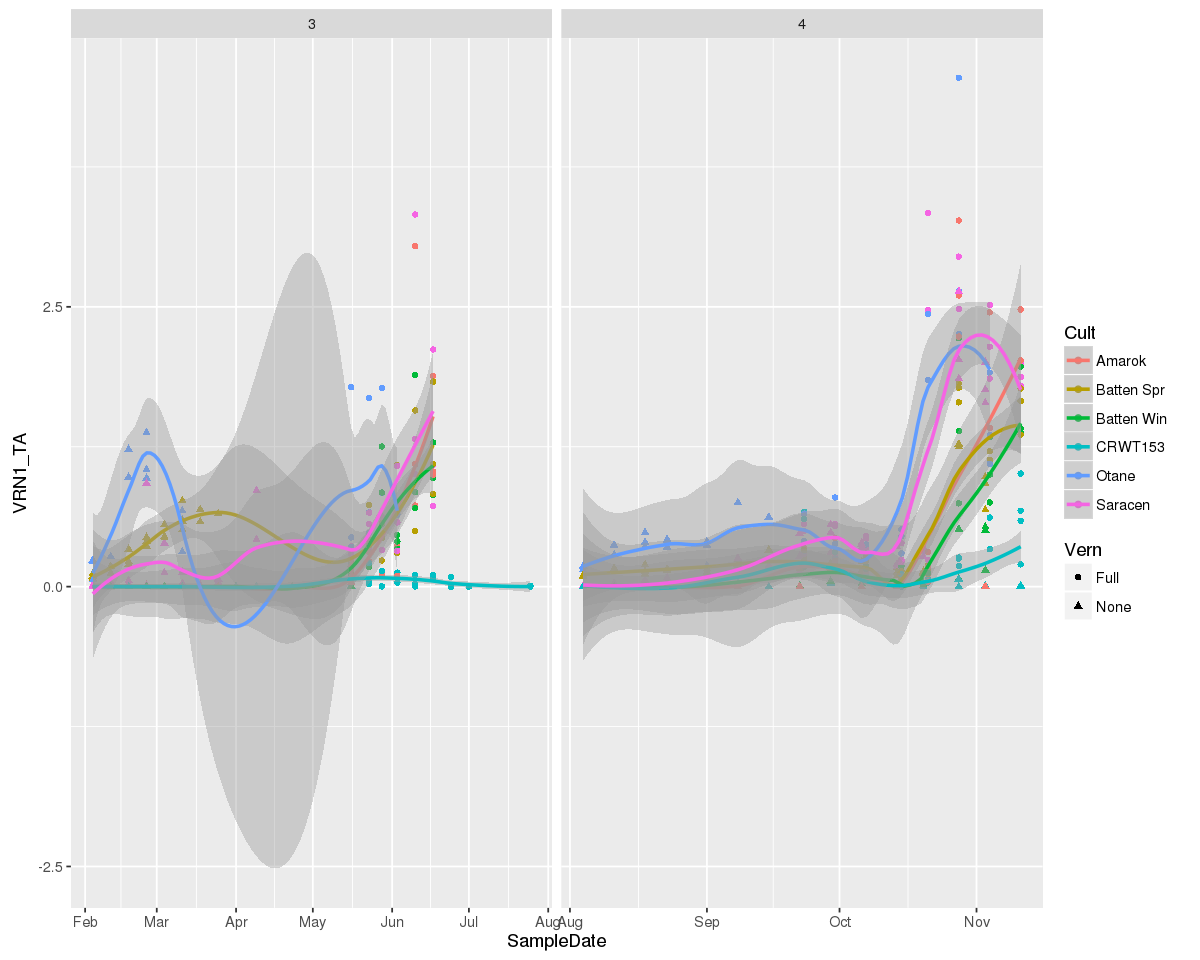

In [43]:
options(repr.plot.width=10, repr.plot.height=8)
qPCRMean_Set1 %>%
    ggplot(aes(x=SampleDate,y=VRN1_TA)) + geom_point(aes(shape=Vern,colour=Cult)) +
  geom_smooth(aes(colour=Cult),span = 0.5) +
    facet_wrap(~ Experiment,scales = "free_x")

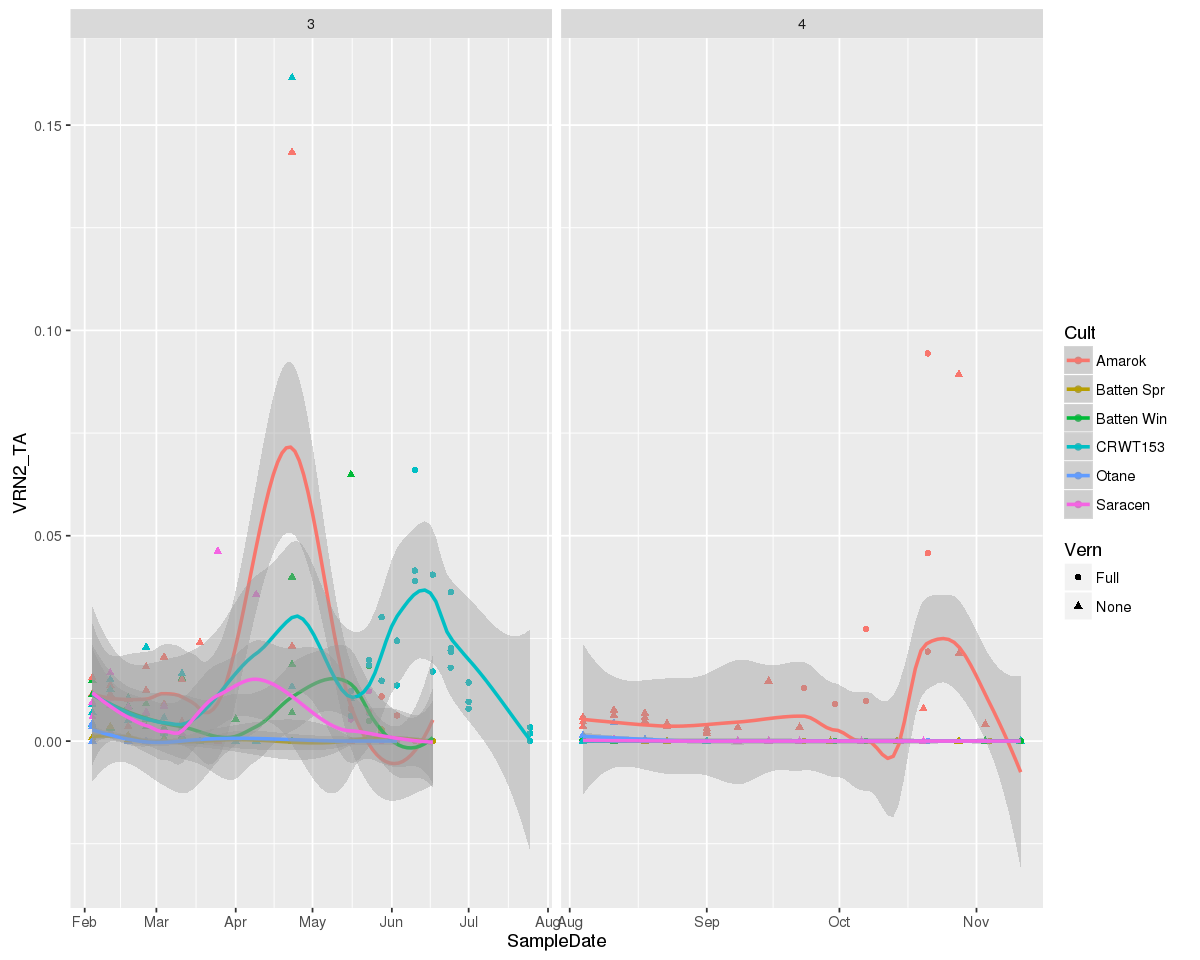

In [44]:
options(repr.plot.width=10, repr.plot.height=8)
qPCRMean_Set1 %>%
    ggplot(aes(x=SampleDate,y=VRN2_TA)) + geom_point(aes(shape=Vern,colour=Cult)) +
  geom_smooth(aes(colour=Cult),span = 0.5) +
    facet_wrap(~ Experiment,scales = "free_x")

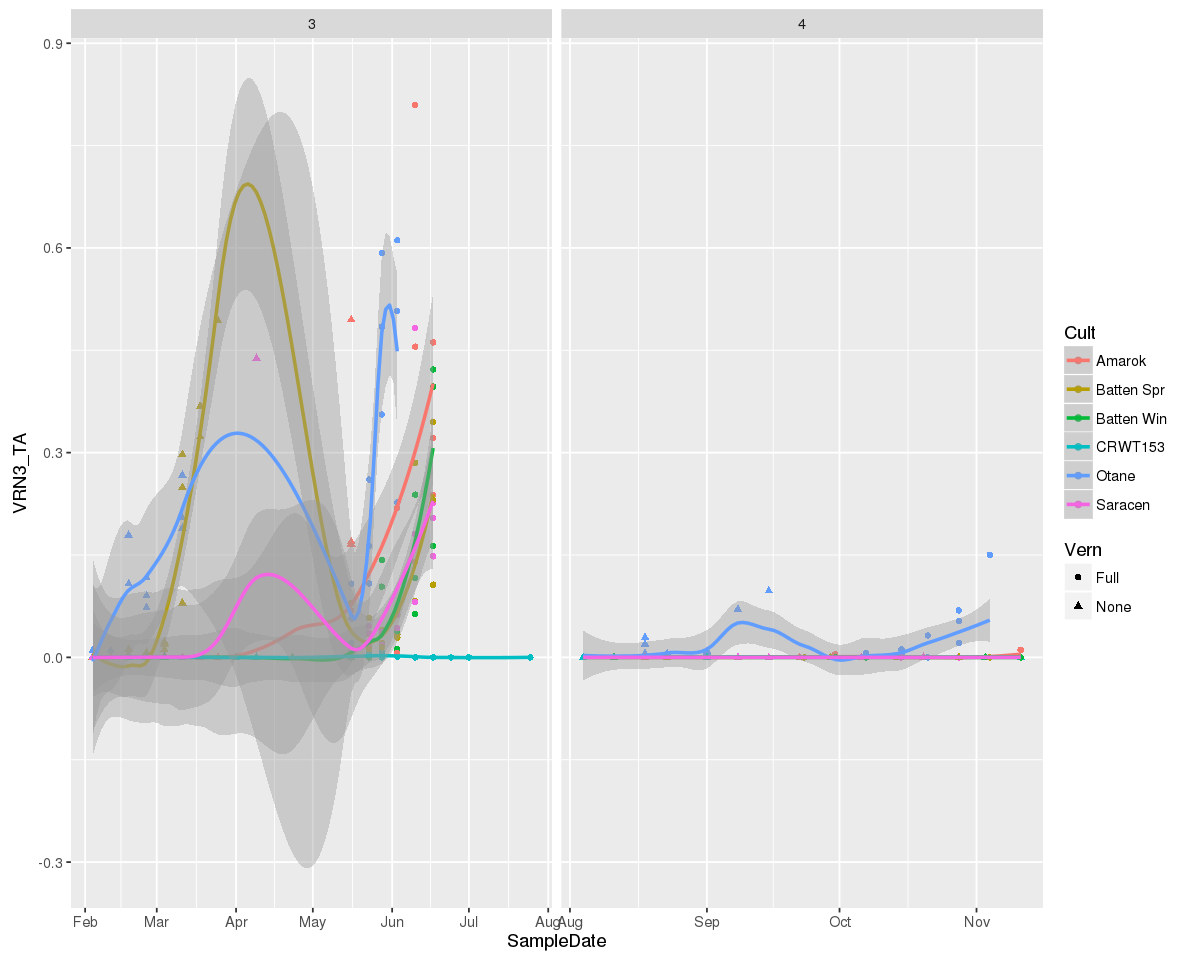

In [45]:
options(repr.plot.width=10, repr.plot.height=8)
qPCRMean_Set1 %>%
    ggplot(aes(x=SampleDate,y=VRN3_TA)) + geom_point(aes(shape=Vern,colour=Cult)) +
  geom_smooth(aes(colour=Cult),span = 0.5) +
    facet_wrap(~ Experiment,scales = "free_x")

Dump to csv

In [46]:
qPCRMean_Set1 %>% write_csv('./qPCRMean_Set1.csv')

### Load up the Repeats